## Notebook to start making projections over the twenty first century


This notebook is used to make projections of the wind influence on sea level rise in the 21th century. 



From the regression between zos and vas/uas (cmip6 data) the regression coefficients are used to make predictions into the 21st century (files: nearby_wind_regression_cmip6, timmerman_regression_cmip6, dangendorf_regression_cmip6). Only models are used that perform well according to spectral analysis (file: comparison). 


Currently, the analysed scenarios are 2.6, 4.5 and 8.5

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('/Users/iriskeizer/Projects/ClimatePhysics/Thesis/Github/Thesis-KNMI/Projections/code')

import import_data as imprt
import projections as proj
import figures as fig

sce_labels = ['ssp126', 'ssp245', 'ssp585']
sce_names = ['SSP1-2.6', 'SSP2-4.5', 'SSP5-8.5']
use_models = 'allmodels'


#### Import zos data

In [2]:
# Open data file
zos_126 = imprt.import_cmip6_slh_data(data_type = 'ssp126', use_models = use_models)
zos_245 = imprt.import_cmip6_slh_data(data_type = 'ssp245', use_models = use_models)
zos_585 = imprt.import_cmip6_slh_data(data_type = 'ssp585', use_models = use_models)

In [3]:
imprt.import_cmip6_slh_data(data_type = 'historical', use_models = use_models)

model,ACCESS-CM2,ACCESS-ESM1-5,BCC-CSM2-MR,CAMS-CSM1-0,CAS-ESM2-0,CMCC-CM2-SR5,CMCC-ESM2,CNRM-CM6-1,CNRM-ESM2-1,CanESM5,...,INM-CM4-8,INM-CM5-0,IPSL-CM6A-LR,MIROC-ES2L,MIROC6,MPI-ESM1-2-HR,MPI-ESM1-2-LR,MRI-ESM2-0,NESM3,UKESM1-0-LL
time,,,,,,,,,,,,,,,,,,,,,
1850,-3.425896,5.986613,-3.753392,0.267185,0.070740,0.834016,7.322974,-3.815722,-1.516900,7.553762,...,4.656646,1.146920,-2.918287,3.014877,-4.806077,0.892315,0.787317,6.233296,7.114786,3.292033
1851,0.016901,6.086028,-4.336680,5.869863,3.273423,5.911148,7.657526,1.811446,-4.483397,13.607738,...,4.344208,-0.698220,-0.946923,4.029792,-5.461465,-0.578507,-2.529444,5.247426,-0.206777,3.575261
1852,0.214255,-0.102335,-5.667346,3.391782,-0.628808,4.615159,7.479408,-2.103830,-3.745529,10.338875,...,1.186002,-1.176297,2.726275,0.665155,-4.959316,-5.998339,0.155783,4.465715,-1.638802,6.058067
1853,-0.204885,1.812496,-8.682094,2.779541,2.016558,3.455125,7.959799,4.704309,-0.161860,9.747133,...,1.604294,-0.079654,0.642669,1.176310,-4.402802,-2.677122,0.997226,5.884628,4.061511,3.983527
1854,0.524503,4.781175,0.654878,0.967230,-1.804349,-1.200758,5.605023,3.665958,4.881058,9.237927,...,4.522746,2.394547,-0.318552,2.189030,-3.327860,-4.799611,1.855377,0.207513,2.691127,6.382934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,10.271232,-0.879096,-0.330408,-4.268958,3.528706,3.780572,3.009060,0.579277,0.837318,-2.527581,...,-0.088275,0.044138,7.405352,-0.893747,5.398382,1.377578,1.480400,7.626748,-0.254946,3.683962
2011,7.974182,5.153455,-1.425496,-7.137427,0.735581,7.823397,-0.225813,0.207375,-1.151538,-0.521905,...,-0.348899,1.732991,6.644731,-0.052985,4.981664,6.890736,-3.756797,5.320757,1.653201,-2.039407
2012,3.777886,4.595845,1.974337,0.015483,-0.167331,10.737544,7.059437,-3.727732,-1.233584,3.848332,...,-0.923705,2.192354,6.458820,2.755885,4.563660,5.154053,-3.490179,5.305406,-3.031902,-4.124324


#### Plot zos data

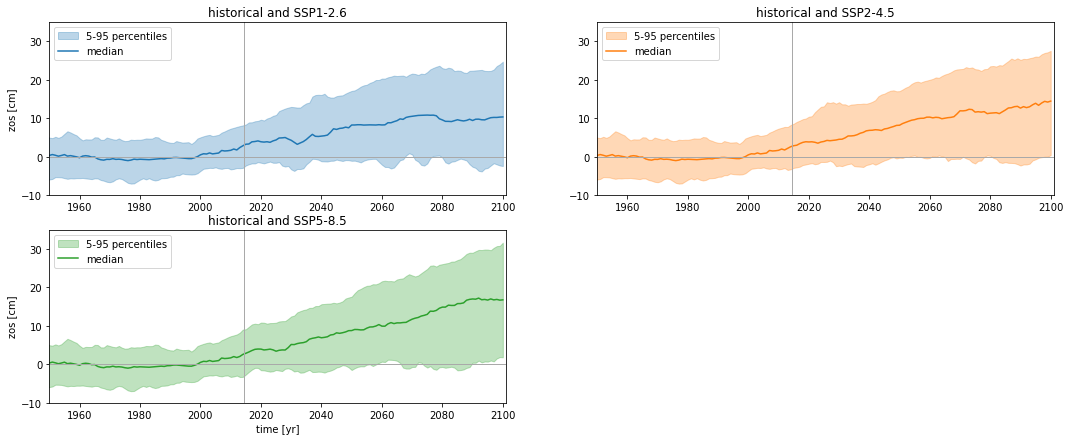

In [4]:
scenarios_zos = [zos_126, zos_245, zos_585]

fig.plot_zos_med_percentiles_per_scenarios(scenarios_zos, sce_labels, sce_names, ra=5, hist_start = 1950)

## NearestPoint wind regression model

MSL = constant + coef_u2 x u2 + coef_v2 x v2


What do we need to obtain projections?
- cmip6 data for scenario
- regression results over historical period (from the regression of sea level averaged over all stations)
- whether these regression results are significant

In [5]:
model_np = 'NearestPoint'

#### Import wind data

In [6]:
# Open data file
wind_126_np = imprt.import_cmip6_wind_data(data_type = 'ssp126', use_models = use_models)
wind_245_np = imprt.import_cmip6_wind_data(data_type = 'ssp245', use_models = use_models)
wind_585_np = imprt.import_cmip6_wind_data(data_type = 'ssp585', use_models = use_models)


UnboundLocalError: local variable 'models' referenced before assignment

#### Plot wind data

In [ ]:
wind_scenarios_np = [wind_126_np, wind_245_np, wind_585_np]

In [ ]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

#### Obtain projections

In [ ]:
proj_126_np, results_np = proj.wind_contr_proj(wind_126_np, use_models = use_models)
proj_245_np, results_np = proj.wind_contr_proj(wind_245_np, use_models = use_models)
proj_585_np, results_np = proj.wind_contr_proj(wind_585_np, use_models = use_models)

In [ ]:
scenarios_np = [proj_126_np, proj_245_np, proj_585_np]

Not much difference between the scenarios.

In [ ]:
fig.plot_med_percentiles_scenarios(scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

In [ ]:
fig.plot_med_percentiles_per_scenarios(scenarios_np, sce_labels, sce_names, ra=5, hist_start = 1950)

## Timmerman wind regression model

MSL       =    

            constant

         + (coef_u2 x u2 + coef_v2 x v2)_channel + (coef_u2 x u2 + coef_v2 x v2)_south

         + (coef_u2 x u2 + coef_v2 x v2)_midwest + (coef_u2 x u2 + coef_v2 x v2)_mideast
         
         + (coef_u2 x u2 + coef_v2 x v2)_northwest + (coef_u2 x u2 + coef_v2 x v2)_northeast



In [ ]:
model_tim = 'Timmerman'

#### Import wind data

In [ ]:
# Open data file
wind_126_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp126', use_models = use_models)
wind_245_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp245', use_models = use_models)
wind_585_tim = imprt.import_cmip6_wind_data(model = model_tim, data_type = 'ssp585', use_models = use_models)


#### Plot wind data

The wind is plotted per model as an average over the Timmerman regions

In [ ]:
wind_scenarios_tim = [wind_126_tim, wind_245_tim, wind_585_tim]


In [ ]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_tim, sce_labels, sce_names, ra=5, hist_start = 1950, wind_model = model_tim)

In [ ]:
proj_126_tim, results_tim = proj.wind_contr_proj(wind_126_tim, wind_model = model_tim, use_models = use_models)
proj_245_tim, results_tim = proj.wind_contr_proj(wind_245_tim, wind_model = model_tim, use_models = use_models)
proj_585_tim, results_tim = proj.wind_contr_proj(wind_585_tim, wind_model = model_tim, use_models = use_models)

In [ ]:
scenarios_tim = [proj_126_tim, proj_245_tim, proj_585_tim]


Especially the non-smoothed projections are very different from the NearestPoint wind model

In [ ]:
fig.plot_med_percentiles_scenarios(scenarios_tim, sce_labels, sce_names, hist_start = 1950, wind_model = model_tim)

In [ ]:
fig.plot_med_percentiles_per_scenarios(scenarios_tim, sce_labels, sce_names, hist_start = 1950, ra=5, wind_model = model_tim)

## Dangendorf wind regression model

MSL = constant + coef_neg x negative corr. region + coef_pos x positive corr. region



In [ ]:
model_da = 'Dangendorf'

#### Import pressure data

In [ ]:
# Open data file
wind_126_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp126', use_models = use_models)
wind_245_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp245', use_models = use_models)
wind_585_da = imprt.import_cmip6_wind_data(model = model_da, data_type = 'ssp585', use_models = use_models)

#### Plot pressure data

In [ ]:
wind_scenarios_da = [wind_126_da, wind_245_da, wind_585_da]


In [ ]:
fig.plot_wind_med_percentiles_per_scenario(wind_scenarios_da, sce_labels, sce_names, ra=5, hist_start = 1950, wind_model = model_da)

In [ ]:
proj_126_da, results_da = proj.wind_contr_proj(wind_126_da, wind_model = model_da, use_models = use_models)
proj_245_da, results_da = proj.wind_contr_proj(wind_245_da, wind_model = model_da, use_models = use_models)
proj_585_da, results_da = proj.wind_contr_proj(wind_585_da, wind_model = model_da, use_models = use_models)

In [ ]:
scenarios_da = [proj_126_da, proj_245_da, proj_585_da]


Especially the non-smoothed projections are very different from the NearestPoint wind model

In [ ]:
fig.plot_med_percentiles_scenarios(scenarios_da, sce_labels, sce_names, hist_start = 1950, wind_model = model_da)

In [ ]:
fig.plot_med_percentiles_per_scenarios(scenarios_da, sce_labels, sce_names, hist_start = 1950, ra=5, wind_model = model_da)

## Compare the different wind models

#### Historical and projected wind contribution to mean sea level

In [ ]:
scenarios_comp = [scenarios_np, scenarios_tim, scenarios_da]


In [ ]:
fig.plot_med_percentiles_per_scenarios_all_wind_models(scenarios_comp, sce_labels, sce_names, hist_start = 1950, ra=5)

### Annual trends over 2001 - 2100

Dangendorf found trends between -0.14 and 0.60 mm/y

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress

wind_labels = ['NearestPoint', 'Timmerman', 'Dangendorf']
markers = ['<', '^', '>']


plt.figure(figsize=(8,6))

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se']})
        df = df.set_index('variable')
        for k, model in enumerate(scenario.columns): # loop over the models
            trend = linregress(scenario.index.values, scenario[model].values).slope
            se = linregress(scenario.index.values, scenario[model].values).stderr
            df[model] = [trend, se]
            
            plt.scatter(sce_labels[j], trend, marker = markers[i])
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = sce_labels))
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)

plt.ylabel('Linear trend [mm/y]')



In [ ]:
def significance_test(p, alpha):
    if p < alpha: return True
    else: return False

In [ ]:
colors = ['b', 'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 
              'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan', 'g', 'k']
models = scenarios_comp[0][2].columns
significance_level = 95

dfs_wmodels = []
for i, scenarios in enumerate(scenarios_comp): # loop over the wind models
    
    plt.figure(figsize=(8,4))
    plt.title(wind_labels[i])
    plt.ylabel('Linear trend [mm/y]')
    dfs_scenarios = []
    for j, scenario in enumerate(scenarios): # loop over the scenarios
        
        df = pd.DataFrame({'variable':['trend', 'se', 'sig']})
        df = df.set_index('variable')
        for k, model in enumerate(models): # loop over the models
            if model in scenario:
                trend = linregress(scenario.index.values, scenario[model].values).slope
                se = linregress(scenario.index.values, scenario[model].values).stderr
                p = linregress(scenario.index.values, scenario[model].values).pvalue
                sig = significance_test(p, 1-significance_level/100)
                df[model] = [trend, se, sig]
                #plt.errorbar(labels[j], trend, yerr=se, fmt="o", label = 'Tide gauge')
                if sig:
                    plt.scatter(sce_labels[j], trend, color = colors[k], label = model)
                
        dfs_scenarios.append(df)
    dfs_wmodels.append(pd.concat(dfs_scenarios, axis=1, keys = sce_labels))
    plt.ylim(-0.012, 0.022)
    plt.legend(bbox_to_anchor=(1.05, 1.0))
    
    
trend_df = pd.concat(dfs_wmodels, axis=1, keys = wind_labels).swaplevel(2,1, axis=1)



Most annual trends are not significant on the 95% significance level and the significant ones are very very small.

### Plot percentile bars

Following: https://github.com/dlebars/CMIP_SeaLevel/blob/master/notebooks/plot_zostoga.ipynb

#### 2001 - 2021

In [ ]:
percentiles, median = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names)

In [ ]:
percentiles

In [ ]:
median

In [ ]:
scenario = scenarios_comp[0][0]
year_s = 1850
year_e = 1900

df_trend = pd.DataFrame({'variable':['trend']})
df_trend = df_trend.set_index('variable')
for model in scenario:
    df_trend[model] = linregress(scenario[model].loc[year_s:year_e].index,
                                                scenario[model].loc[year_s:year_e].values).slope
                
df_trend.quantile(p/100, axis=1).values[0]

In [ ]:
df_trend

In [ ]:
year_s = 2000
year_e = 2100

linregress(scenario[model].loc[year_s:year_e].index,
                                                scenario[model].loc[year_s:year_e].values).slope

In [ ]:
median['NearestPoint'].index

In [ ]:
median['NearestPoint'].values

In [ ]:
fig.summary_fig_and_table(percentiles['NearestPoint'].T, wind_model = 'NearestPoint')

In [ ]:
fig.summary_fig_and_table(percentiles['Timmerman'].T, wind_model = 'Timmerman')

In [ ]:
fig.summary_fig_and_table(percentiles['Dangendorf'].T, wind_model = 'Dangendorf')

In [ ]:
fig.summary_fig_and_table_all_wind_models(percentiles)

There is no significant long term change of atmospheric contribution to sea level over the 21st century. The observed wind influence is probably a natural variability

#### 1901 - 2000

In [ ]:
percentiles_19 = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = 1900.5, year_e = 2000.5)

In [ ]:
fig.summary_fig_and_table_all_wind_models(percentiles_19, period = '1901 - 2000', name = '1901_2000', ymin=-0.1, ymax=0.1)

#### Different periods (50 years)

In [ ]:
years = [1900.5, 1950.5, 2000.5, 2050.5]
period = 50

for year in years:
    percentiles = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = year, year_e = year+period)
    year = round(year)
    fig.summary_fig_and_table_all_wind_models(percentiles, period = f'{year} - {year+period}', name = f'{year}_{year+period}', 
                                              ymin = -0.1, ymax=0.1)


#### Different periods (25 years)

In [ ]:
years = [1900.5, 1925.5, 1950.5, 1975.5, 2000.5, 2025.5, 2050.5, 2075.5]
period = 25

for year in years:
    percentiles = fig.make_percentile_df(scenarios_comp, sce_labels, sce_names, year_s = year, year_e = year+period)
    year = round(year)
    fig.summary_fig_and_table_all_wind_models(percentiles, period = f'{year} - {year+period}', name = f'{year}_{year+period}', 
                                              ymin = -0.1, ymax=0.1)
